In [1]:
import altair as alt
import pandas as pd
import numpy as np
import warnings

In [2]:
df = pd.read_csv("../data/spread_history/chi_spread_summary.csv")

In [3]:
df = df[df.year.eq(2021)]

In [4]:
df_piv = df.T

In [5]:
df_piv[0][2:] = df_piv[0][2:].str.split(" ", expand=True)[1].str.replace("(", "").str.replace(")","").str.replace("%", "")

In [6]:
df = df_piv.rename({0: "value"}, axis=1)

In [7]:
df = df.reset_index().query("index != 'Unnamed: 0'").query("index != 'year'").sort_values("value")

In [8]:
df["value"] = pd.to_numeric(df.value)

In [9]:
# background etc.
primary_color = "#0B162A" 
# font etc.
secondary_color = "#c83803"

In [ ]:
        gridcolor = "grey",


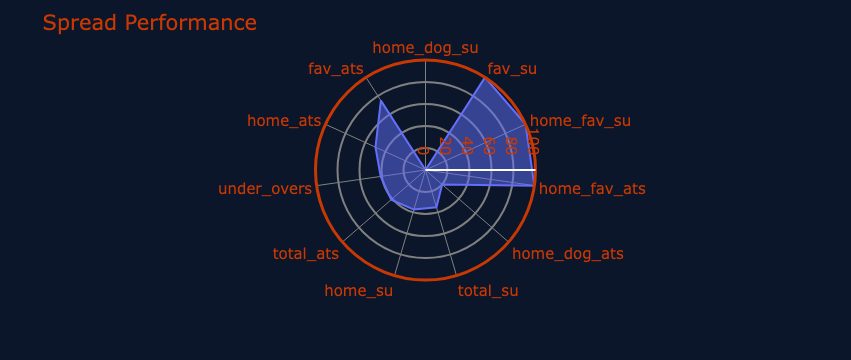

In [31]:
import plotly.express as px
import pandas as pd
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
 
fig = px.line_polar(df, r='value', theta='index', line_close=True)
fig.update_traces(fill='toself')
#fig.update_layout(paper_bgcolor=primary_color)
#fig.update_layout(font=dict(color=secondary_color)) 
#fig.update_layout(plot_bgcolor="red")

#plot_bgcolor='rgba(0,0,0,0)'


fig.update_layout(
    title = "Spread Performance",
    font_size = 15,
    showlegend = False,
    font=dict(color=secondary_color),
    polar = dict(
      bgcolor = primary_color,
      angularaxis = dict(
        linewidth = 3,
        showline=True,
        gridcolor = "grey",
        linecolor=secondary_color,
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        gridcolor = "grey",
        gridwidth = 2,
      ),        
    ),
    paper_bgcolor = primary_color
)


fig.show()